In [ ]:
list = (df[["u","alpha"]].corr(), df[["g","delta"]].corr(),
        df[["r","redshift"]].corr(), df[["z","alpha"]].corr(),
        df[["i","alpha"]].corr())
for corr in list:
    print(corr, "\n\n")

              u     alpha
u      1.000000 -0.001532
alpha -0.001532  1.000000 


              g     delta
g      1.000000  0.003523
delta  0.003523  1.000000 


                 r  redshift
r         1.000000  0.433241
redshift  0.433241  1.000000 


              z     alpha
z      1.000000 -0.002918
alpha -0.002918  1.000000 


             i    alpha
i      1.00000 -0.02358
alpha -0.02358  1.00000 




In [ ]:
print("Pearson correlation coefficient:", st.pearsonr(df["u"],
                                                      df["alpha"]))

Pearson correlation coefficient: PearsonRResult(statistic=-0.0015316817049988722, pvalue=0.6281342941920107)


In [ ]:
print("Pearson correlation coefficient:", st.pearsonr(df["g"],
                                                      df["delta"]))

Pearson correlation coefficient: PearsonRResult(statistic=0.003523380604805516, pvalue=0.2652018416125669)


In [ ]:
print("Pearson correlation coefficient:", st.pearsonr(df["r"],
                                                      df["redshift"]))

Pearson correlation coefficient: PearsonRResult(statistic=0.43324073516450334, pvalue=0.0)


In [ ]:
print("Pearson correlation coefficient:", st.pearsonr(df["z"],
                                                      df["alpha"]))

Pearson correlation coefficient: PearsonRResult(statistic=-0.0029177680398609547, pvalue=0.3561793611016764)


In [ ]:
print("Pearson correlation coefficient:", st.pearsonr(df["i"],
                                                      df["alpha"]))

Pearson correlation coefficient: PearsonRResult(statistic=-0.023580015911599223, pvalue=8.81131176178404e-14)


In [ ]:
# we select dependent variable (label)
y = df["fiber_ID"]

# we select independent variable
x = df.drop("fiber_ID", axis = 1)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size = 0.25,
                                                    shuffle = True,
                                                    random_state = 1)

In [ ]:
numeric_columns = x_train.select_dtypes(include=np.number)
norm = MinMaxScaler(feature_range=(0, 1))
norm.fit(numeric_columns)
x_train.loc[:, numeric_columns.columns] = norm.transform(numeric_columns)
x_test.loc[:, numeric_columns.columns] = norm.transform(x_test[numeric_columns.columns])


In [ ]:
print(x_train[0:5])
print("\n")
print(x_train.shape)
print("_________________________________________________________________________")
print(x_test[0:5])
print("\n")
print(x_test.shape)

       obj_ID     alpha     delta         u         g         r         i  \
52205     0.0  0.657843  0.519931  0.999270  0.998965  0.542245  0.472286   
266       0.0  0.641268  0.641761  0.998986  0.999120  0.558293  0.447872   
23482     0.0  0.704031  0.581294  0.998850  0.998935  0.565952  0.492498   
78508     0.0  0.504019  0.294312  0.998596  0.998584  0.359134  0.316435   
71009     0.0  0.489440  0.766408  0.998561  0.998538  0.336868  0.297931   

              z    run_ID  rerun_ID  cam_col  field_ID  spec_obj_ID   class  \
52205  0.999044  0.473985         0      0.6  0.062372     0.092754    STAR   
266    0.998975  0.382218         0      0.2  0.028630     0.086957  GALAXY   
23482  0.999139  0.276419         0      1.0  0.028630     0.673913     QSO   
78508  0.998717  0.728176         0      1.0  0.149284     0.240580    STAR   
71009  0.998682  0.357631         0      0.2  0.001022     0.240580    STAR   

       redshift     plate       MJD  
52205  0.001393  0.09258

In [ ]:
print(y_train.head())
print(y_train.shape)
print("___________________________")
print(y_test.head())
print(y_test.shape)

52205    406
266      212
23482    819
78508    168
71009    628
Name: fiber_ID, dtype: int64
(75000,)
___________________________
43660     75
87278     30
14317    517
81932    451
95321    681
Name: fiber_ID, dtype: int64
(25000,)


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x=df.drop('class',axis=1).values
y=df['class'].values

In [ ]:
x_train , x_test , y_train , y_test = train_test_split(x,y, test_size= 0.33 , random_state= 42)

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter
smote = SMOTE(random_state=42)
print('Original dataset shape %s' % Counter(y))
print('Original ytrain dataset shape %s' % Counter(y_train))
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)
print('Resampled ytrain dataset shape %s' % Counter(y_train_smote))

Original dataset shape Counter({'GALAXY': 59445, 'STAR': 21594, 'QSO': 18961})
Original ytrain dataset shape Counter({'GALAXY': 39820, 'STAR': 14505, 'QSO': 12675})
Resampled ytrain dataset shape Counter({'GALAXY': 39820, 'QSO': 39820, 'STAR': 39820})


In [ ]:
from sklearn.ensemble import RandomForestClassifier


In [ ]:
rf = RandomForestClassifier(max_depth=7 , max_features=3,n_estimators= 100)
rf.fit(x_train_smote, y_train_smote )

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=7, max_features=3,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [ ]:
rf.score(x_train_smote, y_train_smote)


0.9714799933031977

In [ ]:
rf.score(x_test,y_test)


0.960030303030303

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report

In [ ]:
v = confusion_matrix(y_test , rf.predict(x_test))
v

array([[18743,   724,   158],
       [  435,  5850,     1],
       [    1,     0,  7088]], dtype=int64)

(<Figure size 640x480 with 1 Axes>,
 <AxesSubplot: xlabel='predicted label', ylabel='true label'>)

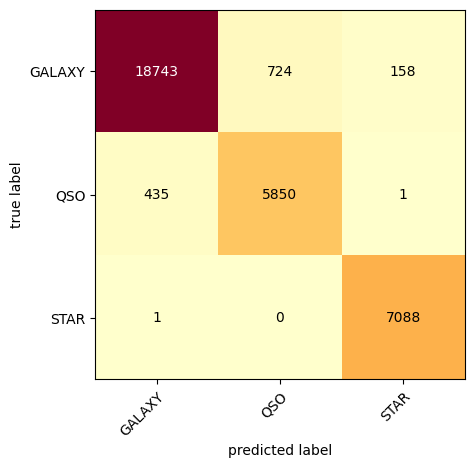

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
plot_confusion_matrix(v , class_names=["GALAXY","QSO","STAR"], cmap='YlOrRd')